In [1]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

import sys
#import qibullet as qb
# import os, os.path
# import config
# import hsmm_train
# import optimize
# from wrap_model import Wrap_model
#import plot as plt

# Optional: support for 3D plotting in the NB
%matplotlib widget
# turn this off, if you don't need it

In [2]:
panda_left_arm_chain = Chain.from_json_file("/home/ip-bihandovers/ip_bimanual/kobo_ros_core_ias/ip_bimanual/robots/panda_left_arm.json")
panda_right_arm_chain = Chain.from_json_file("/home/ip-bihandovers/ip_bimanual/kobo_ros_core_ias/ip_bimanual/robots/panda_right_arm.json")

/home/ip-bihandovers/.local/lib/python3.8/site-packages/ikpy/urdf/URDF.py:261: UserWarning: Joint panda_left_joint8 is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored
  warnings.warn("Joint {} is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored".format(joint.attrib["name"]))
/home/ip-bihandovers/.local/lib/python3.8/site-packages/ikpy/urdf/URDF.py:261: UserWarning: Joint panda_right_joint8 is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored
  warnings.warn("Joint {} is of type: fixed, but has an 'axis' attribute defined. This is not in the URDF spec and thus this axis is ignored".format(joint.attrib["name"]))


In [3]:
for link_index, (link_active, link) in enumerate(zip(panda_left_arm_chain.active_links_mask, panda_left_arm_chain.links)):
    print(link_active, link.name)

False Base link
False torso_joint
False panda_left_joint_torso
True panda_left_joint1
True panda_left_joint2
True panda_left_joint3
True panda_left_joint4
True panda_left_joint5
True panda_left_joint6
True panda_left_joint7
False panda_left_joint8
False panda_left_hand_joint
False panda_left_finger_joint1
False last_joint


In [4]:
for link_index, (link_active, link) in enumerate(zip(panda_right_arm_chain.active_links_mask, panda_right_arm_chain.links)):
    print(link_active, link.name)

False Base link
False torso_joint
False panda_right_joint_torso
True panda_right_joint1
True panda_right_joint2
True panda_right_joint3
True panda_right_joint4
True panda_right_joint5
True panda_right_joint6
True panda_right_joint7
False panda_right_joint8
False panda_right_hand_joint
False panda_right_finger_joint1
False last_joint


In [7]:
starting_node_angles = [0] * len(panda_right_arm_chain.links)
print(len(panda_right_arm_chain.links))
panda_right_arm_chain.active_from_full(starting_node_angles)

14


array([0, 0, 0, 0, 0, 0, 0])

In [8]:
frame_target = np.eye(4)
frame_target[:3, 3] = [0.5,0.5,0.5]

ik = panda_right_arm_chain.inverse_kinematics_frame(frame_target,optimizer='scalar')
#pepper_right_arm_chain.plot(ik, ax, target=[xr,yr,zr])
ik

array([ 0.        ,  0.        ,  0.        ,  1.80441929,  1.83253915,
       -2.21021069, -0.40007513,  2.44642797,  1.09831372,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

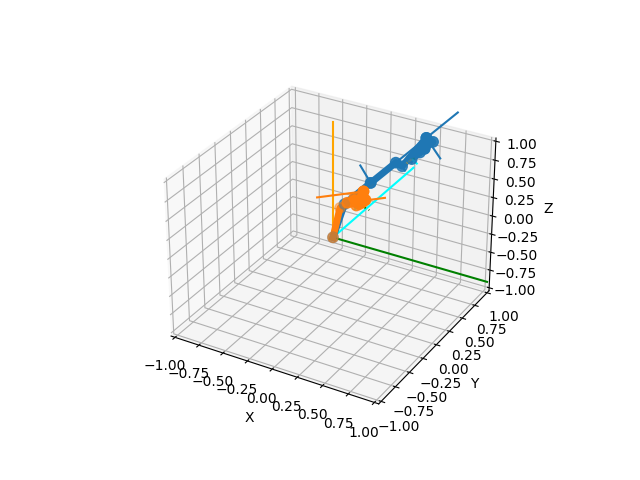

In [9]:
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure()
panda_left_arm_chain.plot([0] * (len(panda_left_arm_chain)), ax)
panda_right_arm_chain.plot([0] * (len(panda_right_arm_chain)), ax)

interactive(children=(FloatSlider(value=0.5182000000000001, description='xl', max=2.5182, min=-1.4817999999999…

<function __main__.goto(xl, yl, zl, xr, yr, zr)>

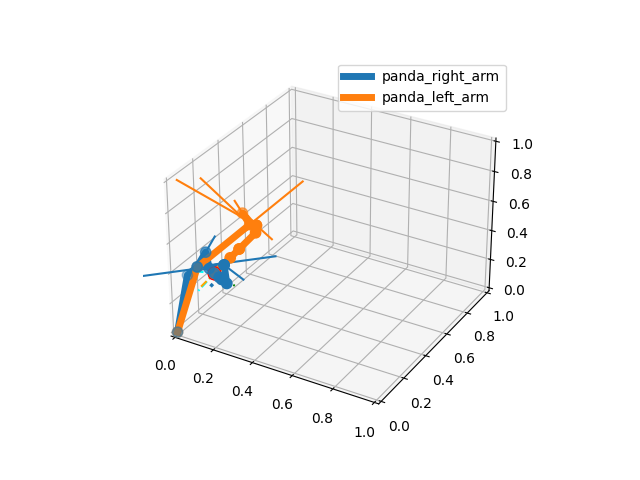

In [4]:
### Let's try some IK
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
fig, ax = plot.init_3d_figure()

x, y, z = panda_right_arm_chain.forward_kinematics([0] * (len(panda_left_arm_chain)))[:3,3]
size = 2

xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
def goto(xl, yl, zl, xr, yr, zr):
    ax.clear()
    ax.set_xlim3d()
    ax.set_ylim3d()
    ax.set_zlim3d()
    
    frame_target = np.eye(4)
    frame_target[:3, 3] = [xr,yr,zr]

    ik = panda_right_arm_chain.inverse_kinematics_frame(frame_target,optimizer='scalar')
    panda_right_arm_chain.plot(ik, ax, target=[xr,yr,zr])

    frame_target[:3, 3] = [xl,yl,zl]

    ik = panda_left_arm_chain.inverse_kinematics_frame(frame_target,optimizer='scalar')
    panda_left_arm_chain.plot(ik, ax, target=[xl,yl,zl])

    ax.legend()
    
interact(goto, 
         xl=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         yl=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         zl=FloatSlider(min=z-size, max=z+size, value=z, step=0.01),
         xr=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         yr=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         zr=FloatSlider(min=z-size, max=z+size, value=z, step=0.01))